### Installing Dependancies

In [44]:
!pip install nelson_siegel_svensson
!pip install yfinance

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from nelson_siegel_svensson.calibrate import calibrate_ns_ols
import numpy as np
from numpy import linalg as LA
import seaborn as sns

# Task 2

### Q2. a. and Q2. b.

We selected the country - India. The following dataset contains the daily yields of the Indian bonds with the following maturities from 2006 to 2025(current).

| Maturity  | Source                                                                 |
|-----------|------------------------------------------------------------------------|
| 3 Months  | [India 3-Month Bond Yield](https://in.investing.com/rates-bonds/india-3-month-bond-yield-historical-data) |
| 6 Months  | [India 6-Month Bond Yield](https://in.investing.com/rates-bonds/india-6-month-bond-yield-historical-data) |
| 1 Year  | [India 1-Year Bond Yield](https://in.investing.com/rates-bonds/india-1-year-bond-yield-historical-data) |
| 2 Year  | [India 2-Year Bond Yield](https://in.investing.com/rates-bonds/india-2-year-bond-yield-historical-data) |
| 3 Year  | [India 3-Year Bond Yield](https://in.investing.com/rates-bonds/india-3-year-bond-yield-historical-data) |
| 4 Year  | [India 4-Year Bond Yield](https://in.investing.com/rates-bonds/india-4-year-bond-yield-historical-data) |
| 5 Year  | [India 5-Year Bond Yield](https://in.investing.com/rates-bonds/india-5-year-bond-yield-historical-data) |
| 6 Year  | [India 6-Year Bond Yield](https://in.investing.com/rates-bonds/india-6-year-bond-yield-historical-data) |
| 7 Year  | [India 7-Year Bond Yield](https://in.investing.com/rates-bonds/india-7-year-bond-yield-historical-data) |
| 8 Year  | [India 8-Year Bond Yield](https://in.investing.com/rates-bonds/india-8-year-bond-yield-historical-data) |
| 9 Year  | [India 9-Year Bond Yield](https://in.investing.com/rates-bonds/india-9-year-bond-yield-historical-data) |
| 10 Year  | [India 10-Year Bond Yield](https://in.investing.com/rates-bonds/india-10-year-bond-yield-historical-data) |
| 12 Year  | [India 12-Year Bond Yield](https://in.investing.com/rates-bonds/india-12-year-bond-yield-historical-data) |
| 15 Year  | [India 15-Year Bond Yield](https://in.investing.com/rates-bonds/india-15-year-bond-yield-historical-data) |
| 24 Year  | [India 24-Year Bond Yield](https://in.investing.com/rates-bonds/india-24-year-bond-yield-historical-data) |
| 30 Year  | [India 30-Year Bond Yield](https://in.investing.com/rates-bonds/india-30-year-bond-yield-historical-data) |


In [46]:
df = pd.read_csv('C:/Users/Gast01/WQU-GWP1/India Bond Yield Data.csv') # Change the file path as the path in your device.

df.index = pd.to_datetime(df['Date'])

df = df.drop('Date', axis=1)
df = df.dropna()

In [47]:
def plot_std(df):
  """
  Plotting the standard deviation of the treasury yields for different maturities
  """

  y_std = df.std()
  fig, ax = plt.subplots()
  y_std.plot(figsize = (8,5),marker='o', title='Standard Deviations of Treasury Yields for Different Maturities', alpha=0.8)
  plt.xlabel("Maturity")
  plt.ylabel("Standard Deviation")
  for i in range(len(y_std)):
      ax.annotate(str(round(y_std.iloc[i],2)),xy=(i,y_std.iloc[i]))
  plt.show()

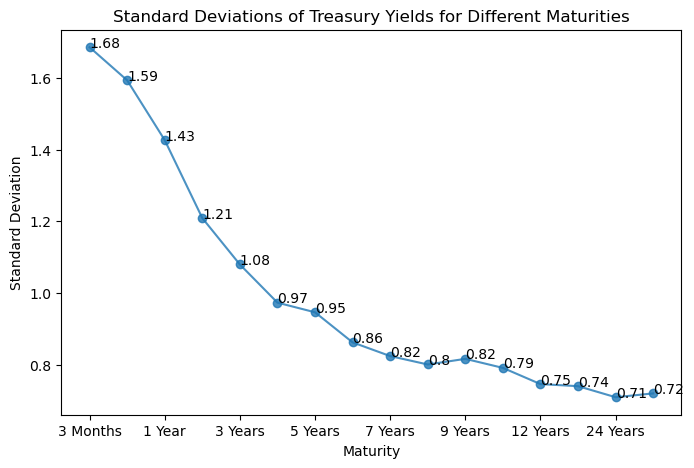

In [48]:
plot_std(df)

In [49]:
def plot_yield_curve(date, fig_n):
    """
    Plotting the yield curve for a given date
    """

    maturities = df.columns # Maturities
    fig, ax = plt.subplots(figsize=(6.15, 4))
    ax.plot(maturities, df.loc[date], marker='D', label='Yield Curve at ' + date)

    ax.set_yticklabels(['{:.2f}%'.format(y) for y in ax.get_yticks()])
    ax.set_xticks(range(len(maturities)))
    labels = [m if i % 5 == 0 else '' for i, m in enumerate(maturities)]
    ax.set_xticklabels(labels)

    # Add labels and title
    ax.set_xlabel('Maturity')
    ax.set_ylabel('Yield')
    ax.set_title(fig_n+f'Treasury Yield Curve as of {date}')

    # Show the plot
    plt.grid(False)
    plt.show()

### Q2. c.


Fitting a Nelson Siegel Model on all the maturities on a specific date and comparing it with the original yield curve as of that date

In [50]:
def fit_ns(t, y, tau0=1.0):
  """
  Fitting the Nelson-Siegel model to the yield curve data for a given date.
  """

  curve, status = calibrate_ns_ols(t, y, tau0=1.0)  # starting value of 1.0 for the optimization of tau
  assert status.success

  print(curve)

  return curve

In [51]:
def plot_ns(date, y_hat, t_hat):
  """
  Plotting the yield curve for a given date.
  """

  plt.plot(t_hat, y_hat(t_hat))
  plt.xlabel("Maturity")
  plt.ylabel("Yield")
  plt.title(f"NS Model Result as of {date}")

  plt.show()

NelsonSiegelCurve(beta0=7.2625370213328555, beta1=-2.273671316630753, beta2=-1.7792154742344135, tau=0.9062508587848979)


C:\Users\Gast01\AppData\Local\Temp\ipykernel_21940\2579923921.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:.2f}%'.format(y) for y in ax.get_yticks()])


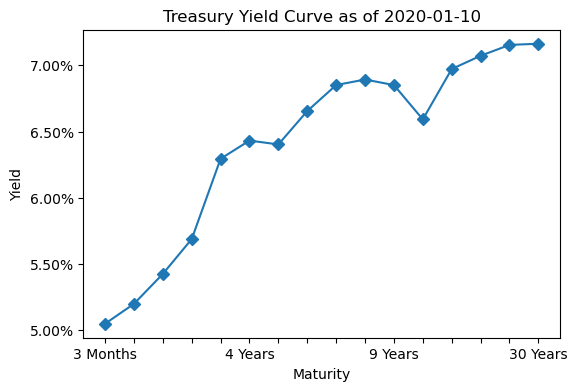

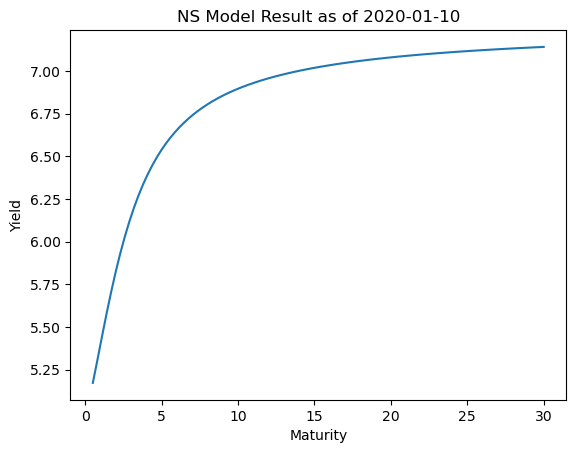

In [52]:
date = "2020-01-10"
t = np.array([0.25,0.5,1,2,3,4,5,6,7,8,9,10,12,15,24,30])
y = np.array(df.loc[date])
curve = fit_ns(t, y, tau0=1.0)
y_hat = curve
t_hat = np.linspace(0.5,30,100)
plot_yield_curve(date,'')
plot_ns(date, y_hat, t_hat)

### Q2. f.

In the solution above, we have fit a Nelson Siegel Model on the yield curve as of 2020-01-10. The result `NelsonSiegelCurve(beta0=np.float64(7.262536960509667), beta1=np.float64(-2.273671047246356), beta2=np.float64(-1.779216868209846), tau=np.float64(0.9062504579008243))` indicates that the $\beta_0$ = 7.26 showing the level of the yield curve. $\beta_1$ = -2.27 shows the slope of the yield curve and the $\beta2$ = -1.77 shows the shape or the curvature of the yield curve. the decay rate indicated by $\tau$ = 0.91 showing a slow rate of decay.

A level of 7.26 shows that the long term expectation of the yields to be around 7%.

A negative slope can be attributed to the fact that there are dips in the long term yields, for example the 10 year yield is smaller than the 6 years, 7years and 8 years yields.

A negative curvature indicates a concave behaviour. The yields started rising steep in the short run, but flatten over a longer period.


This interpretation is in line with the mid pandemic situation in 2020. Complete economic shutdowns has raised riskiness of the short term borrowings, hence the rise in yields sharply.


A smaller value of $\tau$ (close to 1) indicates that the effects of the slope and curvature parameters decay relatively slowly as maturity increases. This suggests that the short-to-medium-term rates have a strong influence on the shape of the curve, but as maturity increases, the curve flattens, and the level dominates.

### Q2. d. and Q2. f.

Fitting a Cubic Spline Model on all the maturities on a specific date and comparing it with the original yield curve as of that date.

Since there are 16 maturities, there would be 15 splines that pass through the 16 points. The splines can be shown as follows:

<br>

$$
f\left( x \right)=a_{1}x^{3}+b_{1}x^{2}+c_{1}x+d_{1}, \quad \text{when } 0.25 \le x \le 0.5
$$

$$
f\left( x \right)=a_{2}x^{3}+b_{2}x^{2}+c_{2}x+d_{2}, \quad \text{when } 0.5 \le x \le 1
$$

$$
f\left( x \right)=a_{3}x^{3}+b_{3}x^{2}+c_{3}x+d_{3}, \quad \text{when } 1 \le x \le 2
$$

and so on...
<br>

From the above equations, we have \( 15 $\times$ 4 = 60 \) unknowns. Hence, we need 60 equations to solve for the parameters.

Thus plugging each boundary, we get 30 equations as shown below:

<br>
$$a_{1}(0.25)^{3}+b_{1}(0.25)^{2}+c_{1}(0.25)+d_{1}=5.05\;\;\;(1)$$
$$a_{1}(0.5)^{3}+b_{1}(0.5)^{2}+c_{1}(0.5)+d_{1}=5.2\;\;\;(2)$$
<br>
<br>
$$a_{2}(0.5)^{3}+b_{2}(0.5)^{2}+c_{2}(0.5)+d_{2}=5.2\;\;\;(3)$$
$$a_{2}(1)^{3}+b_{2}(1)^{2}+c_{2}(1)+d_{2}=5.42\;\;\;(4)$$
<br>
<br>
$$a_{3}(1)^{3}+b_{3}(1)^{2}+c_{3}(1)+d_{3}=5.42\;\;\;(5)$$
$$a_{3}(2)^{3}+b_{3}(2)^{2}+c_{3}(2)+d_{3}=5.69\;\;\;(6)$$
<br>
<br>

Now since each interirior point is a part of 2 splines, their slopes and curvatures must be the same. Therefore, their first order derivatives and their second order derivatives should be the same. Since there are \( 16 - 2 = 14 \) interior points, we get 14 first order equations, and 14 second order equations.

The first order equations are as follows:

<br>
$$3a_{1}(0.5)^{2}+2b_{1}(0.5)+c_{1}=3a_{2}(0.5)^{2}+2b_{2}(0.5)+c_{2}\;\;\;(31)$$
$$3a_{2}(1)^{2}+2b_{2}(1)+c_{2}=3a_{3}(1)^{2}+2b_{3}(1)+c_{3}\;\;\;(32)$$
<br>

The second order equations are as follows:

<br>
$$6a_{1}(0.5)+2b_{1}=6a_{2}(0.5)+2b_{2}\;\;\;(45)$$
$$6a_{2}(1)+2b_{2}=6a_{3}(1)+2b_{3}\;\;\;(46)$$
<br>

In total now we have 58 equations. Finally we assume the "Natural End Condition" and consider the secodn order derivatives of the exterior p[oints to be 0/ Since there are 2 exterior points, we get 2 equations, which gives us full 60 equations.

<br>
$$6a_{1}(0.25)+2b_{1}=0\;\;\;(59)$$
$$6a_{3}(30)+2b_{3}=0\;\;\;(60)$$
<br>

To calculate the cubic spline model, we use the `CubicSpline` function from the **SciPy** library, typically imported as `cs`.

The command is:

`
cs = CubicSpline(t, y, bc_type=((2, 0.0), (2, 0.0)))
`

where:

- `t` = maturities  
- `y` = yields as of a specific date  
- `bc_type=((2, 0.0), (2, 0.0))` sets the **natural end condition** by specifying that the second derivative at the two endpoints is zero.

In [53]:
def fit_cs(t, y, t_hat):
  """
  Fitting a Cubic Spline Model on all the maturities on a specific date.
  """
  cs = CubicSpline(t, y, bc_type=((2, 0.0), (2, 0.0)))
  interpolated_yields = cs(t_hat)
  plt.plot(t_hat, interpolated_yields)



C:\Users\Gast01\AppData\Local\Temp\ipykernel_21940\2579923921.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:.2f}%'.format(y) for y in ax.get_yticks()])


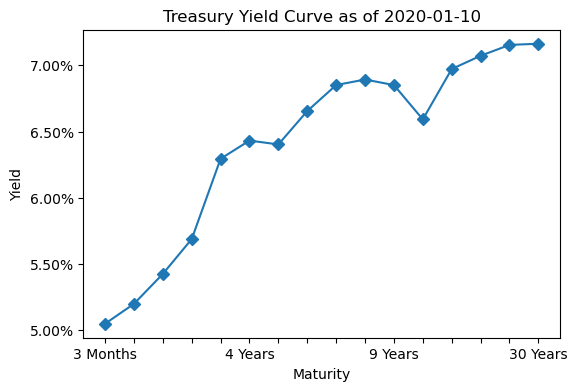

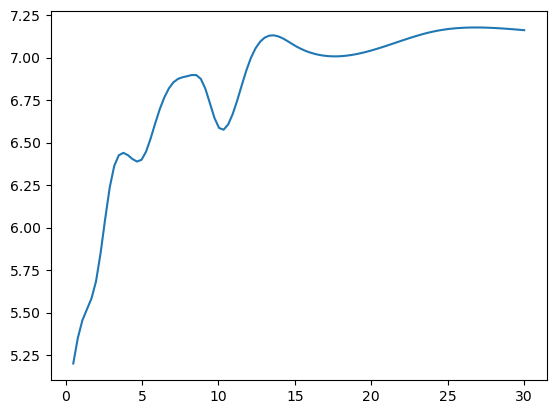

In [54]:
date = "2020-01-10"
t = np.array([0.25,0.5,1,2,3,4,5,6,7,8,9,10,12,15,24,30])
y = np.array(df.loc[date])
t_hat = np.linspace(0.5,30,100)
plot_yield_curve(date,'')
fit_cs(t, y, t_hat)

### Q2. e.


Fit:
- NS Model is a parametric model with defined parameters $\beta_0 , \beta_1$ and  $\beta_2$. The model smoothened the trend of the yield curve and just fit the general level witht the slope and curvature of the curve. It failed to capture the nuances of the mid term maturities. Features like a lower yield in the 10 year maturity did not get captured in the NS Model.

- Cubic Spline is a non parametric model which fits a spline between each point individually and thus captures a much more nuanced view of the yield curve. The fit is indeed much better than the NS Model.

Interpretation:
- Since NS is a parametric approach, its parameters have a strict economic interpretation.
    - $\beta_0$ : Level
    - $\beta_1$ : Slope
    - $\beta_2$ : Curvature
    - $\tau$ : Decay Rate

  It is helpful in making economic decision based on these parameters.

- Cubic Spline takes a non parametric approach and as a result does not have a direct economic interpretation. Its use cases are when one needs a data driven approach to mapping the yield movements, with a certain degree of smoothing involved. However, It is very succeptible to overfitting. Thus one must be careful towards the model complexity-overfitting tradeoff.  

### Q2. g.


Indeed Smoothing data can be considered unethical, as discussed in M2 L4. Howver, whether or not the NS model smoothing is unethical, depends on the specific use cases.

NS Model is a parametric approach to smoothen out the yield curve based on its broad economic parameters, $\beta_0, \beta_1, \beta_2$ and $\tau$. It aims to provide a simpified picture of the economic conditions based on the yields, to provide insights on the expected trends in the market both in the short and long term. In this case the smoothing out is not done to hide variability, it is done to cancel out the noise to identify trends. It is not unethical to smoothen the curve via NS Model in this case.

However, say in a situation where the user does the simplification, but fails to disclose it, with a purpose of hiding variability, or hiding a sharp downturn in the yields, it becomes unethical.

# Task 3

Q3. a & b) Generating 5 Gausian uncorrelated random variables and running Principal Components on Covariance Matrix

In [55]:
np.random.seed(42)
sim_yld = np.random.normal(loc = 0, scale = 0.01, size = (200,5))
yld = pd.DataFrame(sim_yld, columns = ['3 Months', '1 Year', '3 Years', '10 Years', '30 Years'])
mean_yld = yld.mean()
std_yld = yld.std()
yc_standardised = (yld - mean_yld) / std_yld
std_data_cov = yc_standardised.cov()
eigenvalues, eigenvectors = LA.eig(std_data_cov)
principal_components = yc_standardised.dot(eigenvectors)
principal_components.columns = ["PC_1","PC_2","PC_3","PC_4","PC_5"]
df_eigval = pd.DataFrame({"Eigenvalues":eigenvalues}, index=range(1,6))
df_eigval["Explained proportion"] = df_eigval["Eigenvalues"] / np.sum(df_eigval["Eigenvalues"])
df_eigval.style.format({"Explained proportion": "{:.2%}"})

,Eigenvalues,Explained proportion
1,0.821674,16.43%
2,1.169212,23.38%
3,0.929294,18.59%
4,1.066514,21.33%
5,1.013305,20.27%


Q3. c) The above df shows the principal componentsw described by their eigen values and the amount of explanation of the variance they respectively do. As we can see that in case of random variables, which are uncorrelated, the 5 principal components more or less describe an equal proportion of the variance. This can be owed to the fact that the multivariate distributions are i.i.d across the observations.

Q3 d) Plotting the Scree plot of the variance explained by each component.

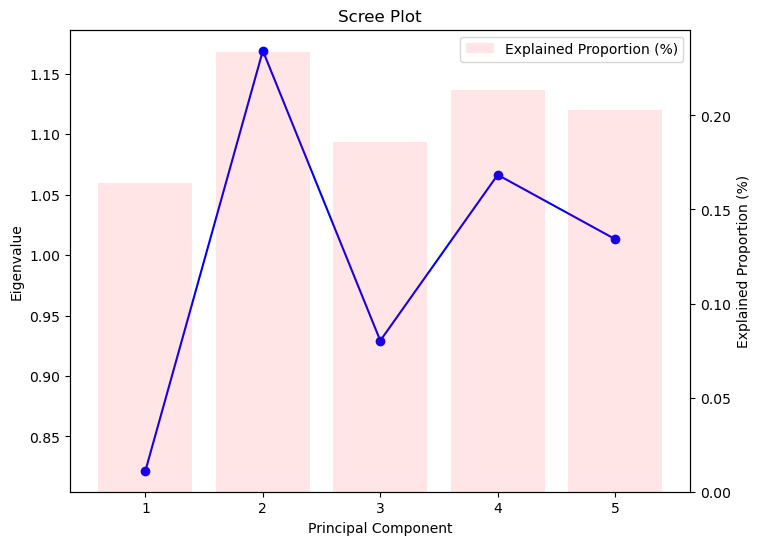

In [56]:
# Plotting the Scree plot

plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), df_eigval['Eigenvalues'], marker='o', linestyle='-', color='b', label='Eigenvalues')
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Eigenvalue")
plt.xticks(range(1, 6))

# Step 2: Plotting explained proportion as bars

plt.twinx()
plt.bar(range(1, 6), df_eigval['Explained proportion'], alpha=0.1, color='r', label="Explained Proportion (%)")
plt.ylabel("Explained Proportion (%)")

plt.grid(False)
plt.legend(loc="upper right")
plt.show()


Here we can see that the explained variance does not reduce as the number of principal components increase. Infact they explain more or less similar proportions of the variance.

Q3. e & f) Loading actual data of government securities, for the past 6 months and converting yields into yield changes.

In [57]:
df = pd.read_csv('C:/Users/Gast01/WQU-GWP1/India Bond Yield Data.csv')
df.index = pd.to_datetime(df['Date'])
df_sec = df[df.index >= (df.index.max() - pd.DateOffset(months=6))]

# Selecting 5 securities
df_sec = df_sec[['3 Months', '1 Year', '3 Years', '10 Years', '30 Years']]

# Converting yields into yield changes and dropping NaNs
df_pct_chg = df_sec.pct_change().dropna()

Q3. g) Running Principal Components on original yields, using covariance matrix.

In [58]:
yld_chg_mean = df_pct_chg.mean()
yld_chg_std = df_pct_chg.std()
standardized_yld_chag = (df_pct_chg - yld_chg_mean) / yld_chg_std
std_yld_chg_cov = standardized_yld_chag.cov()
eigenvalues_yld, eigenvectors_yld = LA.eig(std_yld_chg_cov)
principal_components = standardized_yld_chag.dot(eigenvectors_yld)
principal_components.columns = ["PC_1","PC_2","PC_3","PC_4","PC_5"]
df_eigval_yld = pd.DataFrame({"Eigenvalues":eigenvalues_yld}, index=range(1,6))
df_eigval_yld["Explained proportion"] = df_eigval_yld["Eigenvalues"] / np.sum(df_eigval_yld["Eigenvalues"])
df_eigval_yld.style.format({"Explained proportion": "{:.2%}"})

,Eigenvalues,Explained proportion
1,2.692920,53.86%
2,1.046973,20.94%
3,0.754758,15.10%
4,0.122989,2.46%
5,0.382360,7.65%


Q3. h) From the above df we can see a different picture regarding the eigenvectors and their explanation of the variance. The first PC explains more than 50% of the variance in the yields. This is the "Level" of the yield curve. This shows the long term expectations of the yields. The secodn PC explains almost 21% of the variance. We can interpret this as the "Slope" of the yield curve. Finally the 3rd PC explains about 15% of the variance, and this can be attributed to the "Curvature" of the yield curve, or how fast the slope is changing. The last 2 PCs explain relatively lower proportion of the variance, since the level, slope and curvature are the 3 main principal components.

Q3. i) Producing Scree Plot

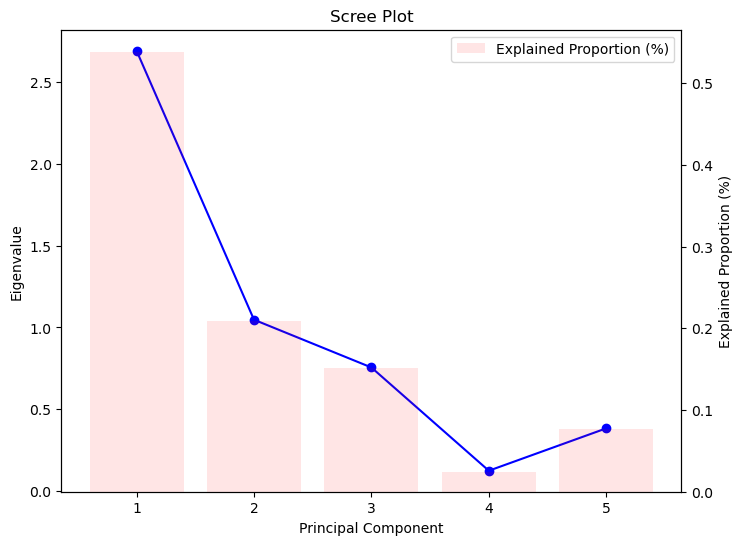

In [59]:
# Plotting the Scree plot

plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), df_eigval_yld['Eigenvalues'], marker='o', linestyle='-', color='b', label='Eigenvalues')
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Eigenvalue")
plt.xticks(range(1, 6))
plt.grid(False)

# Plotting explained proportion as bars
plt.twinx()
plt.bar(range(1, 6), df_eigval_yld['Explained proportion'], alpha=0.1, color='r', label="Explained Proportion (%)")
plt.ylabel("Explained Proportion (%)")
plt.legend(loc="upper right")

# Show the plot
plt.show()

Q3. j.

The above scree plot is more in line with our expectations. The plot can be read as an elbow method. The elbow forming when the first principal component is explaining the highest variance and as the number of PCs increase, they explain lesser and lesser of the variance of the yield curve. In our case, the first three principal components explain about 92% of the data.

This observation is different than the uncorrelated gausian random variables case because the data was generated such that the random variables had a same variance. As a result there is no dominant direction, and the variance is equally spread across the 5 eigenvalues, so the PC algorithm finds similar eigenvalues for the 5 PCs.

Since principal components are dimentionality reduction techniques, they work well when the variables are closely correlated. From the following figure we see that the yield changes from the actual data is more correlated than the gaussian data generation process. Hence PCA performed better on the real data.

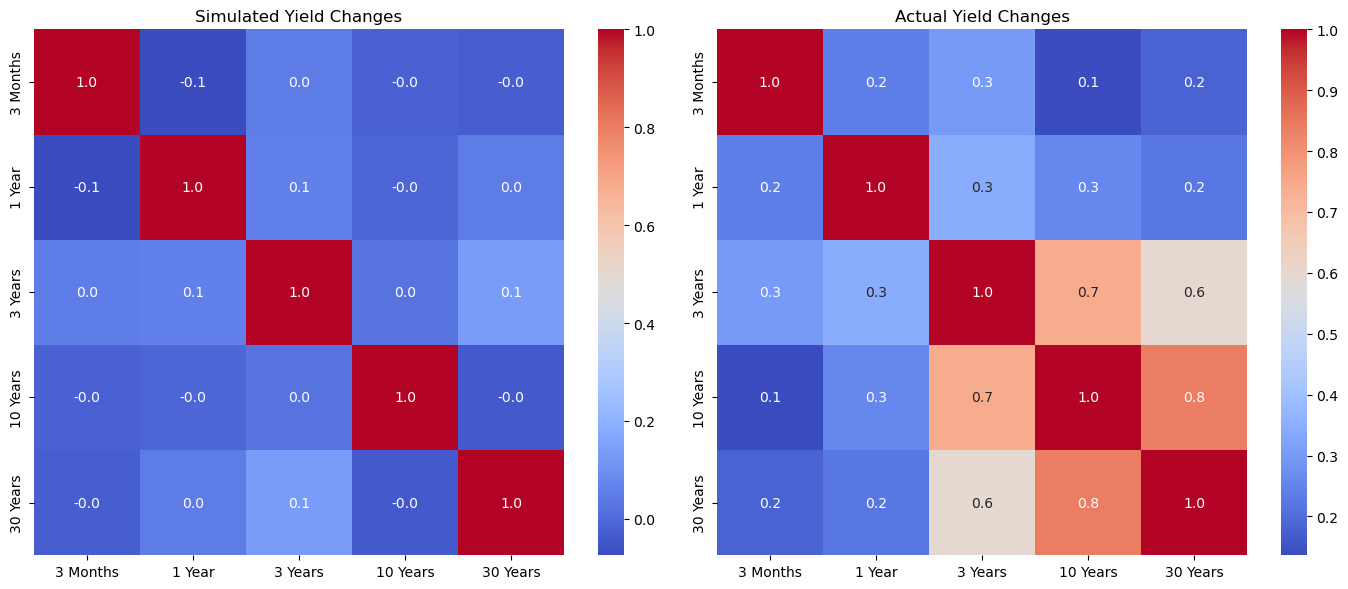

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Simulated yield changes
sns.heatmap(yc_standardised.corr(), annot=True, cmap='coolwarm', fmt=".1f", ax=axes[0])
axes[0].set_title('Simulated Yield Changes')

# Actual yield changes
sns.heatmap(standardized_yld_chag.corr(), annot=True, cmap='coolwarm', fmt=".1f", ax=axes[1])
axes[1].set_title('Actual Yield Changes')

plt.tight_layout()
plt.show()

**QUESTION 4**

**Empirical Analysis of ETFs**

**QUESTIONS 4(a):**

**ANSWER**

For the group work, we decided to select a utility ETF called XLU, which has about 30 Holdings. The index includes securities of companies from the following industries: electric utilities; water utilities; multi-utilities; independent power and renewable electricity producers; and gas utilities. The fund is non-diversified.

In [61]:
# Importing requied libraries

import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yfin
import math

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

from datetime import date

pd.options.display.float_format = "{:,.6f}".format

**QUESTION 4(b):**

**ANSWER**

One year of xlu data had been fetched from yfinance database as follows:

In [62]:
# Starting and end dates
start = datetime.date(2019, 1, 1)
end = datetime.date(2020, 1, 1)

xlu_tickers = [
    "NEE",   # NextEra Energy Inc.
    "SO",    # Southern Company
    "DUK",   # Duke Energy Corporation
    "AEP",   # American Electric Power Company Inc.
    "D",     # Dominion Energy Inc.
    "SRE",   # Sempra
    "EXC",   # Exelon Corporation
    "VST",   # Vistra Corp.
    "PEG",   # Public Service Enterprise Group Inc.
    "PCG",   # PG&E Corporation
    "XEL",   # Xcel Energy Inc.
    "ED",    # Consolidated Edison Inc.
    "AWK",   # American Water Works Company Inc.
    "WEC",   # WEC Energy Group Inc.
    "EIX",   # Edison International
    "ES",    # Eversource Energy
    "ATO",   # Atmos Energy Corporation
    "CMS",   # CMS Energy Corporation
    "NI",    # NiSource Inc.
    "PNW",   # Pinnacle West Capital Corporation
    "CNP",   # CenterPoint Energy Inc.
    "EVRG",  # Evergy Inc.
    "FE",    # FirstEnergy Corp.
    "NRG",   # NRG Energy Inc.
    "OGE",   # OGE Energy Corp.
    "AEE",   # Ameren Corporation
    "AES",   # The AES Corporation
    "LNT",   # Alliant Energy Corporation
    "UGI",   # UGI Corporation
    "IDA"    # IDACORP Inc.
]

# Get ETF data
df = yfin.download(xlu_tickers, start, end, auto_adjust = False)["Adj Close"]

# Convert DataFrame index to timezone-aware (UTC)
df.index = df.index.tz_localize('UTC')

[*********************100%***********************]  30 of 30 completed


Let us have a look at the first five rows of the daily data.

In [63]:
df.head(5)

Ticker,AEE,AEP,AES,ATO,AWK,CMS,CNP,D,DUK,ED,...,OGE,PCG,PEG,PNW,SO,SRE,UGI,VST,WEC,XEL
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02 00:00:00+00:00,53.270638,58.418907,11.534039,77.131927,79.253159,40.172016,23.255316,54.124615,65.633423,59.839413,...,28.728699,23.682159,41.137554,63.742725,33.987129,43.674431,40.206642,19.215071,55.447842,39.967190
2019-01-03 00:00:00+00:00,53.404800,58.282742,11.525903,77.715683,79.565666,40.246857,23.388201,53.866066,65.610168,59.990711,...,28.983990,23.831417,41.129467,64.388847,34.469097,43.874886,40.706722,19.034771,55.595539,39.809704
2019-01-04 00:00:00+00:00,54.159462,58.819374,11.908201,78.711494,80.163826,40.621044,23.820086,54.907814,66.152618,60.962288,...,29.442030,24.279188,41.574585,65.181114,34.756737,45.188057,41.591496,19.807491,56.005760,40.199265
2019-01-07 00:00:00+00:00,53.538963,58.490982,11.965140,78.136307,79.315666,40.413158,23.911448,54.375534,65.873642,60.078316,...,29.284353,18.856174,41.663612,65.058044,34.678986,45.179871,41.676102,20.142344,55.751431,40.025208
2019-01-08 00:00:00+00:00,54.385868,59.211811,12.241695,79.157883,80.476303,41.020199,24.368250,55.006664,66.702774,60.444637,...,29.967651,17.473057,41.825474,66.034912,35.666267,46.443951,41.991550,20.150923,56.325752,40.489365


**Overview of the ETF Data**

We can use the pandas *describe()* method to show summary stats of our data. We can see that all assets have same number of observations (count) since they all belong to the same portfolio. The other summary stats are relatively basic, like mean and standard deviation along with showing minimum, maximum, and a few quantiles.

In [64]:
df.describe()

Ticker,AEE,AEP,AES,ATO,AWK,CMS,CNP,D,DUK,ED,...,OGE,PCG,PEG,PNW,SO,SRE,UGI,VST,WEC,XEL
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,...,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,62.849829,71.180582,14.031441,90.896078,101.687288,49.038936,24.547177,59.984374,71.137369,69.934112,...,32.676920,14.893234,48.428759,72.444121,44.384742,55.560342,39.517781,21.618953,70.069637,49.470814
std,3.245782,5.109216,1.068596,5.416583,9.813964,3.909191,1.196643,3.548472,2.900219,4.330081,...,1.146570,5.269217,2.487902,3.038539,4.653333,5.162168,2.706561,1.422285,6.990331,3.973183
min,53.270638,58.282742,11.525903,77.131927,79.253159,40.172016,21.099733,51.683754,64.827538,59.289902,...,28.728699,3.781185,41.072803,63.435036,33.987129,43.674431,32.437710,18.584152,55.447842,39.809704
25%,60.837066,67.466366,13.314821,87.135111,93.918903,45.967132,24.072489,58.064060,69.467739,67.827507,...,32.078150,10.634584,47.887321,70.596035,40.785181,51.892800,37.717456,20.698179,64.181847,46.539083
50%,63.895058,72.929688,13.999062,92.650070,104.843307,49.257162,24.733862,59.510872,70.553871,70.953804,...,32.867311,17.030259,48.764408,73.282551,44.307463,56.768843,40.448435,21.774379,71.049866,50.785336
75%,65.094208,75.268444,14.701837,95.203959,110.105633,52.592812,25.513127,63.671884,72.968155,72.358782,...,33.288624,18.866125,50.065635,74.517900,49.139080,59.809655,41.575356,22.810293,76.504215,52.605733
max,68.704857,78.527794,16.838135,99.922478,117.211884,55.235107,26.322067,66.020317,77.733902,77.404655,...,35.019451,24.279188,52.458244,77.214264,51.908264,63.737049,43.899555,23.848814,81.964577,55.469280


**QUESTION 4(C) :**

**ANSWER**
**Importance of Daily Returns**

In financial analysis, the daily return of an asset, XLU-ETF in our case, is a fundamental metric used to measure its performance over a single trading day. It definately aids in quantifying the percentage change in the asset's value between the close of one trading day and the close of the subsequent day. To compute a daily return you have to use the closing prices of the asset on two consecutive trading days.

To account for dividend and stock splits, technically, one must use adjusted closing price to avoid impact on the individual prices of an ETF consitituents assets/holdings.



In [65]:
# 1. Compute daily log returns
daily_returns = df.pct_change() # Used simple return to compute the daily return (alternatively: log return can also be used, np.log(df) - np.log(df.shift(1))
daily_returns = daily_returns.dropna()
daily_returns.head()

Ticker,AEE,AEP,AES,ATO,AWK,CMS,CNP,D,DUK,ED,...,OGE,PCG,PEG,PNW,SO,SRE,UGI,VST,WEC,XEL
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-03 00:00:00+00:00,0.002519,-0.002331,-0.000705,0.007568,0.003943,0.001863,0.005714,-0.004777,-0.000354,0.002528,...,0.008886,0.006303,-0.000197,0.010136,0.014181,0.004590,0.012438,-0.009383,0.002664,-0.003940
2019-01-04 00:00:00+00:00,0.014131,0.009207,0.033169,0.012814,0.007518,0.009297,0.018466,0.019340,0.008268,0.016195,...,0.015803,0.018789,0.010822,0.012304,0.008345,0.029930,0.021735,0.040595,0.007379,0.009786
2019-01-07 00:00:00+00:00,-0.011457,-0.005583,0.004782,-0.007308,-0.010580,-0.005118,0.003836,-0.009694,-0.004217,-0.014500,...,-0.005355,-0.223361,0.002141,-0.001888,-0.002237,-0.000181,0.002034,0.016905,-0.004541,-0.004330
2019-01-08 00:00:00+00:00,0.015818,0.012324,0.023113,0.013074,0.014633,0.015021,0.019104,0.011607,0.012587,0.006097,...,0.023333,-0.073351,0.003885,0.015015,0.028469,0.027979,0.007569,0.000426,0.010301,0.011597
2019-01-09 00:00:00+00:00,-0.007401,-0.007575,-0.001993,-0.016376,-0.012758,-0.009528,-0.012270,-0.001659,-0.014754,-0.007905,...,-0.001897,0.015376,-0.007546,-0.013861,-0.008500,-0.009777,-0.010260,-0.006817,-0.005972,-0.007984


**Question 4(d):**

**ANSWER**

In [66]:
# Standardize stock returns dataset
daily_returns_means = daily_returns.mean()
daily_returns_stds = daily_returns.std()
standardized_returns = (daily_returns - daily_returns_means) / daily_returns_stds
standardized_returns.head()

Ticker,AEE,AEP,AES,ATO,AWK,CMS,CNP,D,DUK,ED,...,OGE,PCG,PEG,PNW,SO,SRE,UGI,VST,WEC,XEL
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-03 00:00:00+00:00,0.183467,-0.417136,-0.180848,0.763060,0.275034,0.074823,0.474428,-0.621087,-0.107677,0.196295,...,0.936019,0.058488,-0.115172,1.020420,1.412395,0.330920,0.903831,-0.718700,0.143412,-0.582442
2019-01-04 00:00:00+00:00,1.497990,0.948129,2.525046,1.371677,0.663016,0.908478,1.557150,2.049139,0.984270,1.857467,...,1.734425,0.196466,1.214933,1.250012,0.751041,3.088817,1.559431,2.999621,0.675730,0.959820
2019-01-07 00:00:00+00:00,-1.398541,-0.801954,0.257450,-0.963011,-1.301299,-0.707965,0.314914,-1.165523,-0.596890,-1.873476,...,-0.707872,-2.479325,0.167047,-0.252975,-0.448120,-0.188322,0.170246,1.237130,-0.670014,-0.626204
2019-01-08 00:00:00+00:00,1.689014,1.316873,1.721822,1.401934,1.435291,1.550296,1.611321,1.192958,1.531243,0.630091,...,2.603594,-0.821695,0.377515,1.537098,3.031574,2.876472,0.560524,0.011088,1.005713,1.163311
2019-01-09 00:00:00+00:00,-0.939389,-1.037595,-0.283713,-2.015217,-1.537659,-1.202526,-1.052565,-0.275864,-1.931300,-1.071818,...,-0.308622,0.158748,-1.002373,-1.520920,-1.157912,-1.232676,-0.696668,-0.527763,-0.831610,-1.036772


In [67]:
# Calculate covariance for standardized return matrix
standardized_returns_dvd_sqrt_n=(standardized_returns/math.sqrt(len(standardized_returns)-1))
standardized_returns_cov = standardized_returns_dvd_sqrt_n.T@standardized_returns_dvd_sqrt_n
standardized_returns_cov.head()

Ticker,AEE,AEP,AES,ATO,AWK,CMS,CNP,D,DUK,ED,...,OGE,PCG,PEG,PNW,SO,SRE,UGI,VST,WEC,XEL
Ticker,,,,,,,,,,,,,,,,,,,,,
AEE,1.000000,0.806508,0.522380,0.771704,0.724853,0.834286,0.400583,0.620388,0.662887,0.757681,...,0.781365,0.138429,0.646133,0.758155,0.689450,0.538975,0.345584,0.258080,0.808670,0.827981
AEP,0.806508,1.000000,0.389618,0.716670,0.757823,0.851062,0.479605,0.661854,0.735293,0.800920,...,0.712112,0.143776,0.699679,0.782279,0.734961,0.604646,0.263487,0.235225,0.840927,0.866045
AES,0.522380,0.389618,1.000000,0.440486,0.343414,0.386723,0.291766,0.451333,0.354717,0.390819,...,0.505821,0.070451,0.406286,0.421398,0.350033,0.378617,0.316272,0.381779,0.376721,0.441355
ATO,0.771704,0.716670,0.440486,1.000000,0.665883,0.763398,0.497982,0.592838,0.651969,0.697263,...,0.719998,0.113870,0.600164,0.683686,0.652023,0.559600,0.485826,0.279780,0.686117,0.742385
AWK,0.724853,0.757823,0.343414,0.665883,1.000000,0.827256,0.360151,0.540265,0.659178,0.713846,...,0.638205,0.082089,0.575092,0.716897,0.691635,0.566795,0.261873,0.164898,0.810270,0.779340


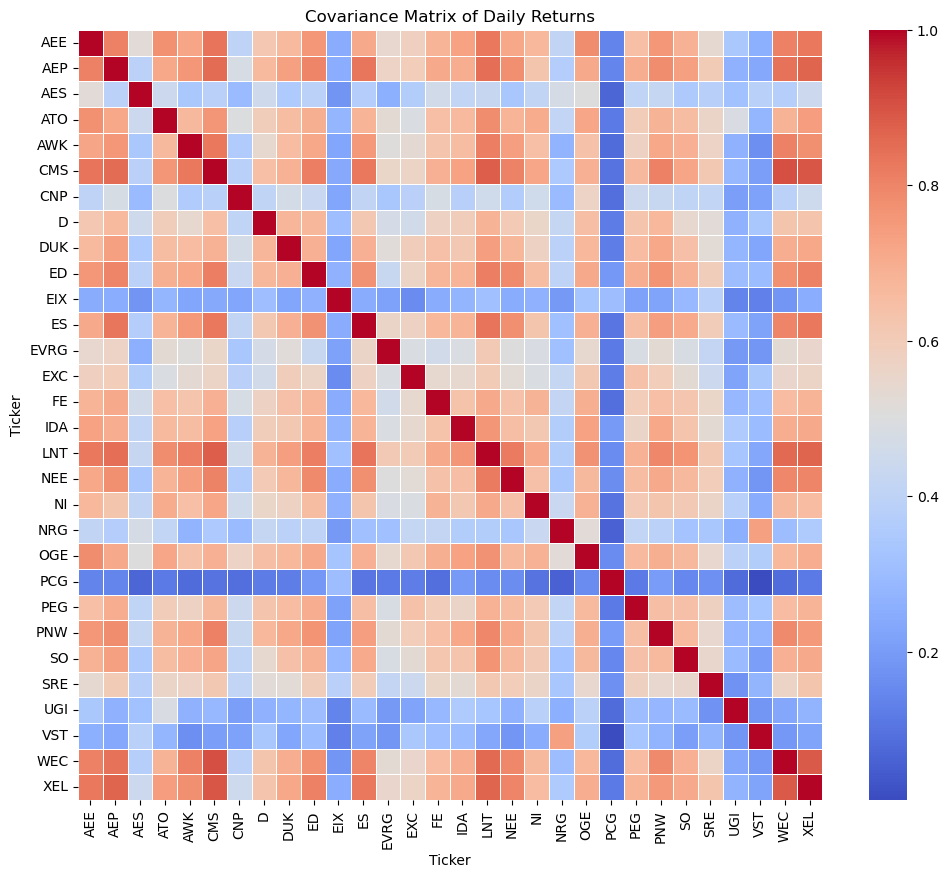

In [68]:
plt.figure(figsize=(12, 10))
sns.heatmap(standardized_returns_cov, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Covariance Matrix of Daily Returns')
plt.show()

**Question 4(e):**

**(compare and contrast PCA and SVD, explain what the eigenvectors, eigenvalues, singular values etc show us for the specific data, etc,)**

**ANSWER**

Both PCA and SVD are dimensionality reduction technicque. They reduce dimensions of matrices but importantly they do retain substantial information or rather variance of a given financial data.

PCA plays a critical role of identifying key factors behind asset price movements whilst reducing dimensionality of risk-based models. Through PCA, one can establish a diversified portfolio based on the principal components. PCA can keep track of unique patterns and ambiguities in portfolio/ETF, which might not be captured in individual asset.

SVD stands for Singular Value Decomposition. It is a robust factorization technique that can effectively decompose any given matrix (Symmetric or not) into 3 matrices, namely, U, SIGMA and V^T. These matrices have mxn, mxn and nxn dimensions respectively. The magnitude of each singular value shows the importance of the corresponding dimension in the data.

Eigen vectors are extracted from PCA and they do represent the principal components which depict relative movements in daily returns of assets. On the other hand, eigenvalues, provides the amount of variance in the daily returns data related to principal components (eigenvector). The higher the eigenvalue, the better it gives information about the asset under analysis.

The following code solutions, shows how Eigenvalues and Eigenvectors help generate Principal Components based on ULX-ETF data under analysis. It is important to note that SVD can be applied to generate eigenvalues and eigenvectors.

In [69]:
# Calculate eigenvectors and eigenvalues of the covariance matrix of standardized dataset
eigenvalues, eigenvectors = np.linalg.eig(standardized_returns_cov)
eigenvalues

array([16.94028168,  1.84467959,  1.26659788,  1.00338301,  0.85284461,
        0.78526915,  0.68313679,  0.62148507,  0.56747643,  0.54817586,
        0.50067043,  0.43553561,  0.39436812,  0.069993  ,  0.08276702,
        0.0974416 ,  0.1012309 ,  0.1310995 ,  0.36516125,  0.35232398,
        0.33001681,  0.2973241 ,  0.2820797 ,  0.16274718,  0.17443706,
        0.1935393 ,  0.2439289 ,  0.23422566,  0.21796411,  0.21981571])

In [70]:
print(pd.DataFrame(eigenvectors).head())

        0         1         2         3         4         5         6   \
0 0.213975  0.029619  0.048258 -0.097895  0.130893  0.023759  0.042472   
1 0.219064  0.116063  0.034320  0.081349  0.006027 -0.016246  0.048883   
2 0.127139 -0.328995  0.058619 -0.160036  0.144880  0.216880  0.387777   
3 0.202650 -0.031362 -0.007037 -0.274623 -0.072982  0.025534 -0.076442   
4 0.201149  0.183299  0.061811 -0.008564  0.061076  0.105053 -0.072020   

         7         8         9   ...        20        21        22        23  \
0 -0.207655  0.096317  0.051575  ... -0.028912  0.341923 -0.220467 -0.238756   
1  0.026483 -0.012475  0.066103  ...  0.192394  0.086957 -0.160605  0.223547   
2 -0.658972 -0.141537 -0.186651  ... -0.012539 -0.139524  0.114498  0.021480   
3  0.032477  0.135005  0.117306  ... -0.166527  0.374332 -0.255891  0.304620   
4  0.013562  0.152691 -0.084542  ... -0.322111 -0.388178  0.055160  0.373393   

         24        25        26        27        28        29  
0 -0.03739

In [71]:
# Transform standardized data with Loadings
principal_components = standardized_returns_cov.dot(eigenvectors)
principal_components.columns = ["PC_" + str(i) for i in range(1, 31)]
principal_components.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,PC_30
Ticker,,,,,,,,,,,,,,,,,,,,,
AEE,3.624796,0.054637,0.061123,-0.098226,0.111631,0.018657,0.029014,-0.129054,0.054657,0.028272,...,-0.009542,0.101662,-0.062189,-0.038857,-0.006523,0.005425,-0.005001,-0.014624,0.063642,0.001140
AEP,3.710999,0.214099,0.043469,0.081625,0.005140,-0.012757,0.033394,0.016459,-0.007079,0.036236,...,0.063493,0.025854,-0.045303,0.036382,0.011349,-0.010464,0.030596,0.027841,0.027745,0.039130
AES,2.153766,-0.606891,0.074247,-0.160577,0.123560,0.170309,0.264905,-0.409541,-0.080319,-0.102317,...,-0.004138,-0.041484,0.032298,0.003496,-0.014897,-0.001431,0.000583,-0.002572,-0.040515,-0.011857
ATO,3.432954,-0.057853,-0.008913,-0.275552,-0.062242,0.020051,-0.052220,0.020184,0.076612,0.064305,...,-0.054957,0.111298,-0.072182,0.049576,0.027501,0.023673,-0.109865,-0.024831,-0.082779,-0.018245
AWK,3.407518,0.338127,0.078290,-0.008592,0.052088,0.082495,-0.049200,0.008429,0.086648,-0.046344,...,-0.106302,-0.115415,0.015560,0.060769,-0.008765,0.009967,-0.007767,-0.100972,0.072352,-0.059361


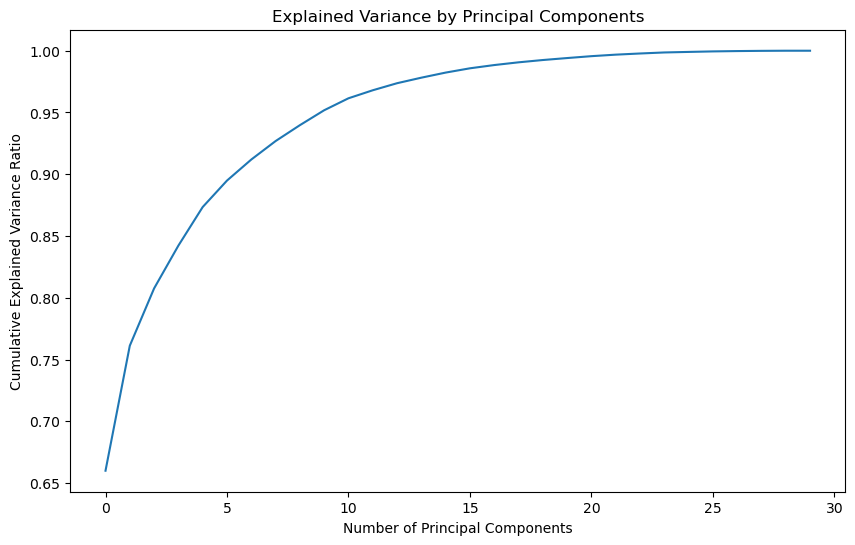

In [72]:
# Visualization for PCA

x = standardized_returns_cov.values  # Convert DataFrame to NumPy array
x = StandardScaler().fit_transform(x)  # Standardize the data

# Apply PCA
pca = PCA(n_components=standardized_returns_cov.shape[1])
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component ' + str(i) for i in range(1, standardized_returns_cov.shape[1] + 1)], index=standardized_returns_cov.index)

# Get explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.show()

**Question 4(f):**

**ANSWER**

In [73]:
# Use SVD to calculate eigenvectors and eigenvalues of the covariance matrix of standardized returns
U_st_return, s_st_return, VT_st_return = np.linalg.svd(standardized_returns_dvd_sqrt_n)
print("\nSquared Singular values (eigenvalues):")
print(s_st_return**2)
print("\nMatrix V (eigenvectors)")
print(pd.DataFrame(VT_st_return.T).head())


Squared Singular values (eigenvalues):
[16.94028168  1.84467959  1.26659788  1.00338301  0.85284461  0.78526915
  0.68313679  0.62148507  0.56747643  0.54817586  0.50067043  0.43553561
  0.39436812  0.36516125  0.35232398  0.33001681  0.2973241   0.2820797
  0.2439289   0.23422566  0.21981571  0.21796411  0.1935393   0.17443706
  0.16274718  0.1310995   0.1012309   0.0974416   0.08276702  0.069993  ]

Matrix V (eigenvectors)
         0         1         2         3         4         5         6   \
0 -0.213975 -0.029619  0.048258 -0.097895  0.130893 -0.023759  0.042472   
1 -0.219064 -0.116063  0.034320  0.081349  0.006027  0.016246  0.048883   
2 -0.127139  0.328995  0.058619 -0.160036  0.144880 -0.216880  0.387777   
3 -0.202650  0.031362 -0.007037 -0.274623 -0.072982 -0.025534 -0.076442   
4 -0.201149 -0.183299  0.061811 -0.008564  0.061076 -0.105053 -0.072020   

         7         8         9   ...        20        21        22        23  \
0 -0.207655  0.096317  0.051575  ... -0

In [74]:
# Presenting the result
print("ETF Returns Matrix Dimension:")
print(daily_returns.shape)
print("\nDimension of Matrix U:")
print(U_st_return.shape)
print("\nSingular values:")
print(s_st_return**2)
print("\nDimension of Matrix V^T:")
print(VT_st_return.shape)

ETF Returns Matrix Dimension:
(251, 30)

Dimension of Matrix U:
(251, 251)

Singular values:
[16.94028168  1.84467959  1.26659788  1.00338301  0.85284461  0.78526915
  0.68313679  0.62148507  0.56747643  0.54817586  0.50067043  0.43553561
  0.39436812  0.36516125  0.35232398  0.33001681  0.2973241   0.2820797
  0.2439289   0.23422566  0.21981571  0.21796411  0.1935393   0.17443706
  0.16274718  0.1310995   0.1012309   0.0974416   0.08276702  0.069993  ]

Dimension of Matrix V^T:
(30, 30)


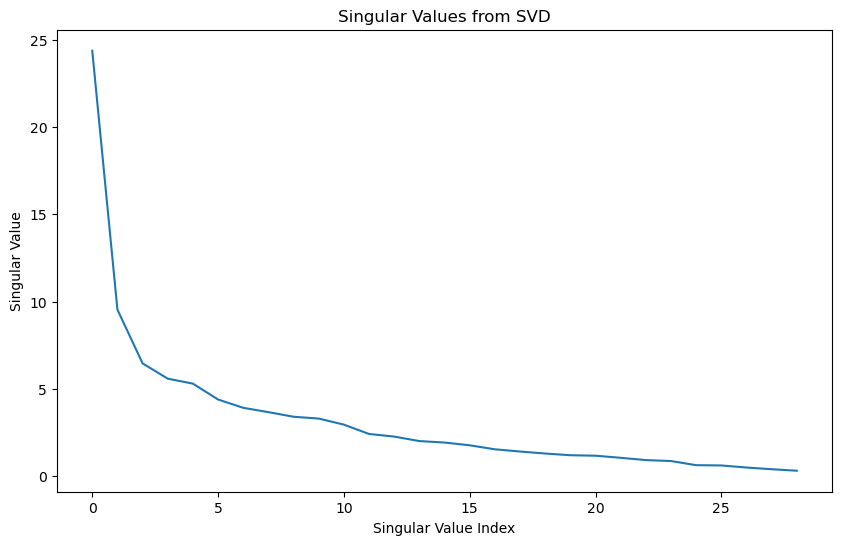

In [75]:
# Visualization for SVD
svd = TruncatedSVD(n_components=standardized_returns_cov.shape[1] - 1)
svd_components = svd.fit_transform(x)
svdDf = pd.DataFrame(data=svd_components, columns=['singular value ' + str(i) for i in range(1, standardized_returns_cov.shape[1])], index=standardized_returns_cov.index)

plt.figure(figsize=(10, 6))
plt.plot(svd.singular_values_)
plt.xlabel('Singular Value Index')
plt.ylabel('Singular Value')
plt.title('Singular Values from SVD')
plt.show()